In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [33]:
inputs = torch.tensor([
    [22, 25], [25, 35],[47, 80],[52, 95], [46, 82], [56, 90],
    [23, 27], [30, 50],[40, 60],[39, 57], [53, 95], [48, 88]
], dtype=torch.float32)

labels = torch.tensor([
    [0], [0], [1], [1], [1], [1], [0], [1], [1], [0], [1],[1]
], dtype=torch.float32)

In [34]:
inputs.shape

torch.Size([12, 2])

In [35]:
model = nn.Sequential(
    nn.Linear(inputs.shape[1], 1),
    nn.Sigmoid()
)
optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

In [36]:
loss_history = []

for step in range(500):
    optimizer.zero_grad()
    loss = criterion(model(inputs), labels)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

In [37]:
loss

tensor(0.1351, grad_fn=<BinaryCrossEntropyBackward0>)

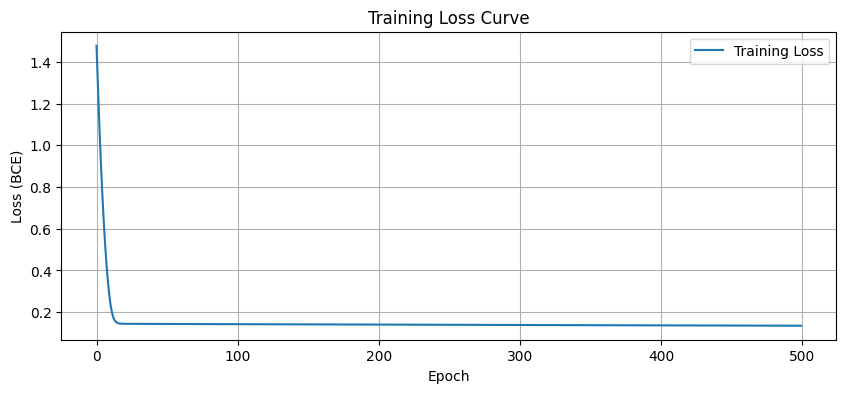

In [38]:
# Plot loss over time
plt.figure(figsize=(10, 4))
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (BCE)')
plt.title('Training Loss Curve')
plt.grid(True)
plt.legend()
plt.show()

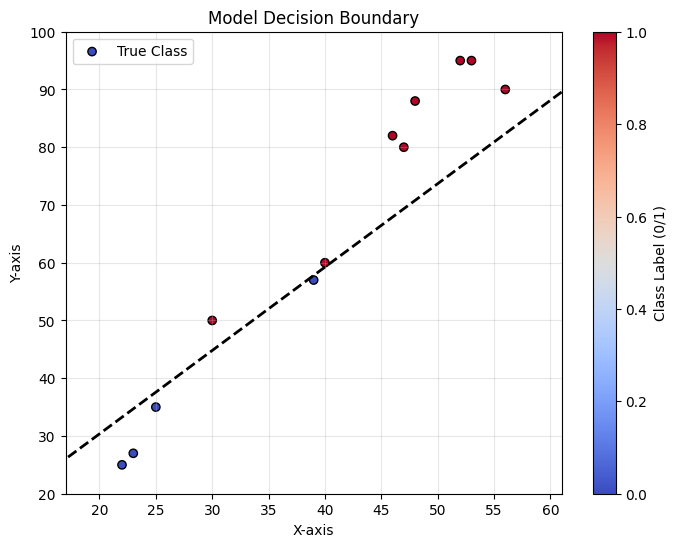

In [42]:
# Create a meshgrid for the decision boundary
x_min, x_max = inputs[:, 0].min() - 5, inputs[:, 0].max() + 5
y_min, y_max = inputs[:, 1].min() - 5, inputs[:, 1].max() + 5

xx, yy = torch.meshgrid(
    torch.linspace(x_min, x_max, 100), 
    torch.linspace(y_min, y_max, 100),
    indexing='ij'
)

grid = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1)

# Predict probabilities for the grid
with torch.no_grad():
    probs = model(grid).reshape(xx.shape)

# Plot the decision boundary (p=0.5 contour)
plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    inputs[:, 0], 
    inputs[:, 1], 
    c=labels.flatten(), 
    cmap='coolwarm', 
    edgecolors='k', 
    label='True Class'
)

contour = plt.contour(
    xx.numpy(), 
    yy.numpy(), 
    probs.numpy(), 
    levels=[0.5], 
    colors='black',
    linestyles='dashed',
    linewidths=2
)
plt.colorbar(scatter, label='Class Label (0/1)')  # Colorbar for scatter points
plt.title('Model Decision Boundary')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

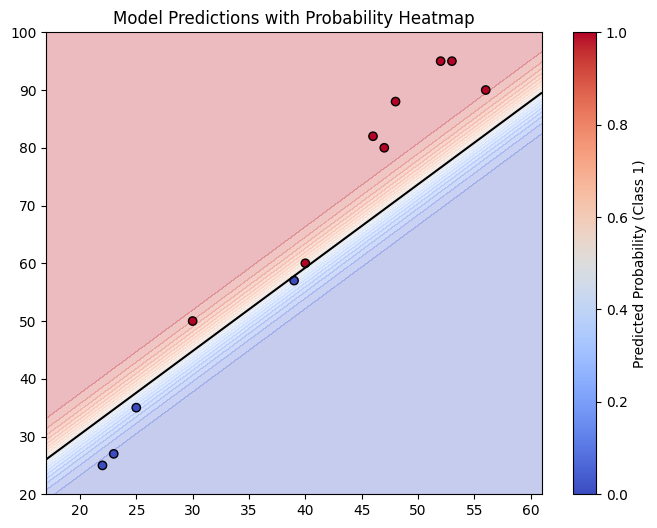

In [43]:
plt.figure(figsize=(8, 6))
plt.contourf(xx.numpy(), yy.numpy(), probs.numpy(), alpha=0.3, levels=20, cmap='coolwarm')
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels.flatten(), cmap='coolwarm', edgecolors='k')
plt.colorbar(label='Predicted Probability (Class 1)')
plt.contour(xx.numpy(), yy.numpy(), probs.numpy(), levels=[0.5], colors='black')
plt.title('Model Predictions with Probability Heatmap')
plt.show()

In [24]:
model( torch.tensor([[22, 24]], dtype=torch.float32) )

tensor([[0.0141]], grad_fn=<SigmoidBackward0>)